In [2]:
#pip install kaggle tensorflow keras matplotlib scikit-learn opencv-python-headless

In [3]:
import kagglehub

# Download the dataset from Kaggle
path = kagglehub.dataset_download("vijaykumar1799/face-mask-detection")
print(f"Dataset downloaded to: {path}")


Dataset downloaded to: C:\Users\Rhea\.cache\kagglehub\datasets\vijaykumar1799\face-mask-detection\versions\1


In [4]:
import os

dataset_path = r"C:\Users\Rhea\.cache\kagglehub\datasets\vijaykumar1799\face-mask-detection\versions\1\Dataset"

# List contents of the Dataset folder
print(os.listdir(dataset_path))


['mask_weared_incorrect', 'without_mask', 'with_mask']


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the images
dataset_path = r"C:\Users\Rhea\.cache\kagglehub\datasets\vijaykumar1799\face-mask-detection\versions\1\Dataset"

# Create data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use 80% of data for training
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 20% of data for validation
)



Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

# Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers
base_model.trainable = False

# Add custom layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: mask, no_mask, incorrect_mask
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10


225/225 [==============================] - 73s 305ms/step - loss: 0.6518 - accuracy: 0.8957 - val_loss: 0.1142 - val_accuracy: 0.9666
Epoch 2/10
225/225 [==============================] - 68s 303ms/step - loss: 0.1851 - accuracy: 0.9423 - val_loss: 0.0769 - val_accuracy: 0.9738
Epoch 3/10
225/225 [==============================] - 67s 296ms/step - loss: 0.1318 - accuracy: 0.9545 - val_loss: 0.0897 - val_accuracy: 0.9710
Epoch 4/10
225/225 [==============================] - 66s 295ms/step - loss: 0.1043 - accuracy: 0.9652 - val_loss: 0.0927 - val_accuracy: 0.9721
Epoch 5/10
225/225 [==============================] - 68s 301ms/step - loss: 0.1224 - accuracy: 0.9533 - val_loss: 0.0789 - val_accuracy: 0.9771
Epoch 6/10
225/225 [==============================] - 66s 293ms/step - loss: 0.0892 - accuracy: 0.9670 - val_loss: 0.1013 - val_accuracy: 0.9760
Epoch 7/10
225/225 [==============================] - 66s 293ms/step - loss: 0.0875 - accuracy: 0.9649 - val_loss: 0.0959 - val_

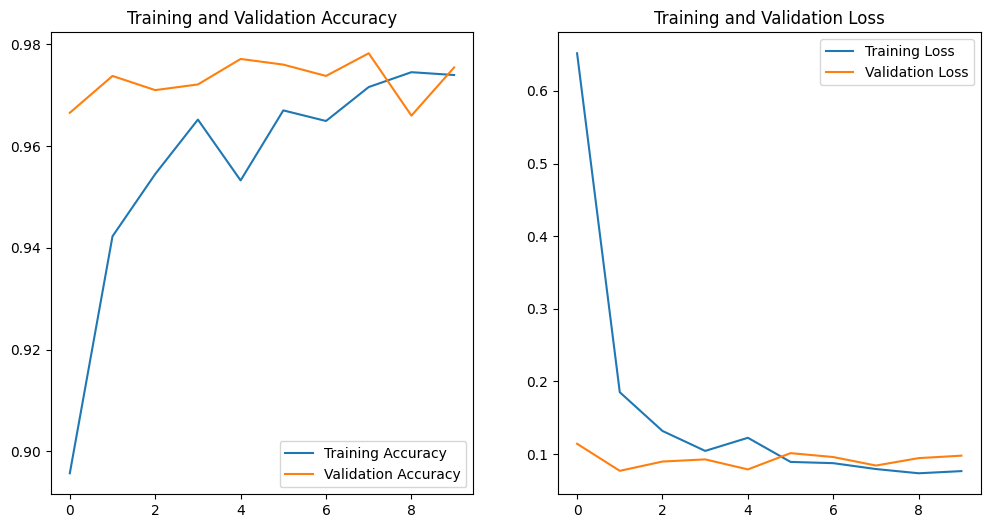

In [8]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


57/57 [==============================] - 13s 202ms/step


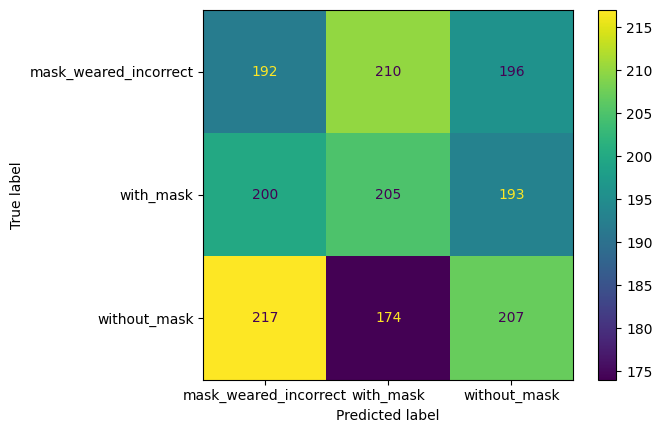

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on validation data
val_preds = model.predict(val_generator)
y_true = val_generator.classes
y_pred = np.argmax(val_preds, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())
cmd.plot()
plt.show()


In [10]:
from sklearn.metrics import classification_report

# Get the true labels and predicted labels
y_true = val_generator.classes
y_pred = np.argmax(val_preds, axis=1)

# Generate the classification report
class_report = classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys())
print("Classification Report:")
print(class_report)


Classification Report:
                       precision    recall  f1-score   support

mask_weared_incorrect       0.32      0.32      0.32       598
            with_mask       0.35      0.34      0.35       598
         without_mask       0.35      0.35      0.35       598

             accuracy                           0.34      1794
            macro avg       0.34      0.34      0.34      1794
         weighted avg       0.34      0.34      0.34      1794

